In [1]:
import keras

In [2]:
print(keras.__version__)

2.10.0


In [3]:
from keras.datasets import imdb
(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)
# 영화 리뷰에서 많이 사용하는 단어 10000개만 가져오기

17464789/17464789 [==============================] - 2s 0us/step


In [6]:
train_data.shape , test_data.shape , train_labels.shape

((25000,), (25000,), (25000,))

In [17]:
train_data[0] 

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [18]:
train_labels[0] # 1,0으로 긍정,부정적 리뷰를 표시

1

In [27]:
word_index = imdb.get_word_index()
# print(word_index) dict 형식, 단어가 어떤 숫자로 저장되어 표기되었는지 알려줌
reverse_word_index = dict([value,key] for (key,value) in word_index.items()) # key와 value를 뽑아 value와 key를 역순으로 dict형식으로 저장

In [30]:
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]]) # 0,1,2 인덱스는 쓸모없는 기호라 빼고 모음

In [31]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [45]:
# 원 핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results
    
X_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [38]:
for i,c in enumerate(['a','b','c'],start=1):
    print(i,c)

1 a
2 b
3 c


In [40]:
temp = enumerate(['a','b','c'])
next(temp)
next(temp)
next(temp)

(2, 'c')

In [46]:
# float type으로 변환
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [58]:
# 신경망의 구축
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [59]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [60]:
x_val = X_train[:10000]
partial_x_train = X_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [61]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.5291 - accuracy: 0.7910 - val_loss: 0.3989 - val_accuracy: 0.8711
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3181 - accuracy: 0.8989 - val_loss: 0.3190 - val_accuracy: 0.8792
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2339 - accuracy: 0.9239 - val_loss: 0.3266 - val_accuracy: 0.8679
Epoch 4/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1859 - accuracy: 0.9395 - val_loss: 0.2744 - val_accuracy: 0.8904
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1525 - accuracy: 0.9513 - val_loss: 0.2752 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1266 - accuracy: 0.9589 - val_loss: 0.2924 - val_accuracy: 0.8857
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1048 - accuracy: 0.9699 - val_loss: 0.3034 - val_accuracy: 0.8829
Epoch 8/20
30

In [62]:
# 실험 결과 데이터를 가져온다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

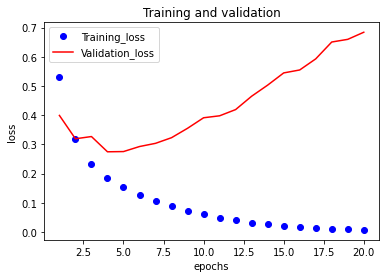

In [65]:
# 실험 결과를 가져온다
import matplotlib.pyplot as plt

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'r-',label='Validation_loss')
plt.title('Training and validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

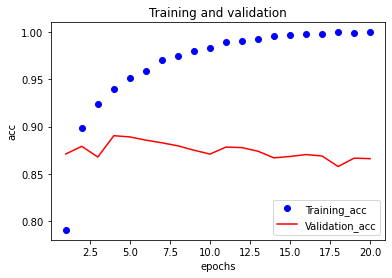

In [66]:
plt.plot(epochs,acc,'bo',label='Training_acc')
plt.plot(epochs,val_acc,'r-',label='Validation_acc')
plt.title('Training and validation')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
# epoch 3~4가 과적합을 피할 수 있는 반복수이다

In [67]:
# 신경망의 구축
from keras import models
from keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# 규제를 추가하여 과적합을 줄임

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [68]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5314 - accuracy: 0.7785 - val_loss: 0.4028 - val_accuracy: 0.8616
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.3233 - accuracy: 0.9006 - val_loss: 0.3227 - val_accuracy: 0.8790
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.2334 - accuracy: 0.9279 - val_loss: 0.2812 - val_accuracy: 0.8896
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 0.1828 - accuracy: 0.9431 - val_loss: 0.2733 - val_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1465 - accuracy: 0.9531 - val_loss: 0.2849 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1229 - accuracy: 0.9618 - val_loss: 0.2901 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1009 - accuracy: 0.9709 - val_loss: 0.3122 - val_accuracy: 0.8827
Epoch 8/20
30

In [69]:
# 실험 결과 데이터를 가져온다
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

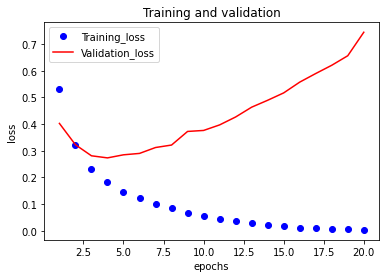

In [70]:
# 실험 결과를 가져온다
import matplotlib.pyplot as plt

plt.plot(epochs,loss,'bo',label='Training_loss')
plt.plot(epochs,val_loss,'r-',label='Validation_loss')
plt.title('Training and validation')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()